In [7]:
import sys
from pathlib import Path

# Add parent directory to Python path so we can import from scripts
project_root = Path.cwd().parent
if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scripts.eda_functions import *

In [63]:
listings_data_path = Path.cwd().parent / "data" / "processed" / "listings_regular_license.parquet"
calendar_data_path = Path.cwd().parent / "data" / "processed" / "calendar_cleaned.parquet"
df = pd.read_parquet(listings_data_path, engine="pyarrow")

In [9]:
df.head()

,id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,reviews_per_month,Host_Category
0,PROP_B6D8,Co - Enti - En #0001,HOST_723A,2012-05-13,"Thessalonika, Greece",within an hour,100%,0.97,True,1,...,4.84,4.79,4.95,4.95,4.74,4.75,LIC_FB61FA,False,2.62,Individual (1)
1,PROP_6279,Ci - Enti - En #0002,HOST_D51E,2012-03-20,"Thessaloniki, Greece",within an hour,100%,1.00,True,104,...,4.87,4.89,4.85,4.85,4.45,4.83,LIC_6BC2B7,True,0.32,Large Multi (4+)
2,PROP_28B3,LU - Enti - En #0003,HOST_33A5,2012-07-10,"Thessalonika, Greece",None,None,NaN,False,2,...,5.00,5.00,5.00,5.00,4.86,4.29,LIC_0000CC,False,0.08,Small Multi (2-3)
3,PROP_2317,He - Enti - En #0004,HOST_CBBB,2012-12-01,"Thessaloniki, Greece",None,None,1.00,False,2,...,4.73,4.79,4.83,4.90,4.71,4.63,LIC_B18A7E,False,1.37,Small Multi (2-3)
4,PROP_B0A8,Th - Priv - Pr #0001,HOST_5772,2012-10-11,"Thessaloniki, Greece",within a day,100%,0.53,True,1,...,4.94,4.98,4.94,4.93,4.65,4.93,LIC_F9CE57,False,1.08,Individual (1)


In [11]:
df.shape

(4380, 49)

### Univariate analysis

### Categorical

1 - neighbourhood_cleansed

CATEGORICAL VARIABLE ANALYSIS: neighbourhood_cleansed

Cardinality: 7 unique categories
Missing values: 0 (0.00%)
Total observations: 4380

Most Common Category: 'Thessaloniki' (3868 occurrences, 88.31%)

Rare Categories (<5%): 6
  - 'Kalamaria': 151 (3.45%)
  - 'Neapolis – Sykeon': 121 (2.76%)
  - 'Pilea – Chortiatis': 75 (1.71%)
  - 'Ampelokipon – Menemeni': 60 (1.37%)
  - 'Pavlou Mela': 60 (1.37%)
  - 'Kordelio – Evosmos': 45 (1.03%)

----------------------------------------------------------------------
FREQUENCY TABLE:
----------------------------------------------------------------------
                        Count  Percentage
neighbourhood_cleansed                   
Thessaloniki             3868   88.310502
Kalamaria                 151    3.447489
Neapolis – Sykeon         121    2.762557
Pilea – Chortiatis         75    1.712329
Ampelokipon – Menemeni     60    1.369863
Pavlou Mela                60    1.369863
Kordelio – Evosmos         45    1.027397


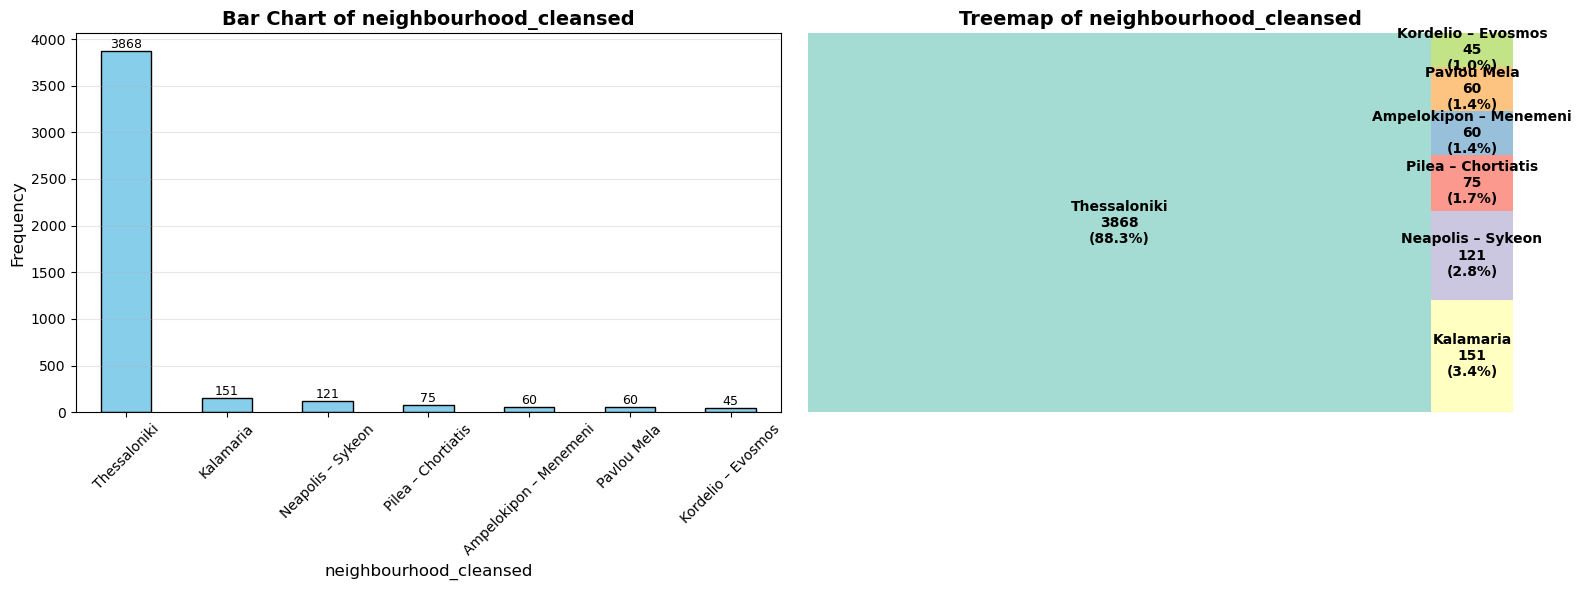

In [10]:
analyze_categorical_variable(df["neighbourhood_cleansed"])

2 - host category

CATEGORICAL VARIABLE ANALYSIS: Host_Category

Cardinality: 4 unique categories
Missing values: 0 (0.00%)
Total observations: 4380

Most Common Category: 'Large Multi (4+)' (2324 occurrences, 53.06%)

No rare categories found (<5% threshold)

----------------------------------------------------------------------
FREQUENCY TABLE:
----------------------------------------------------------------------
                   Count  Percentage
Host_Category                       
Large Multi (4+)    2324   53.059361
Individual (1)      1050   23.972603
Small Multi (2-3)    782   17.853881
nan                  224    5.114155


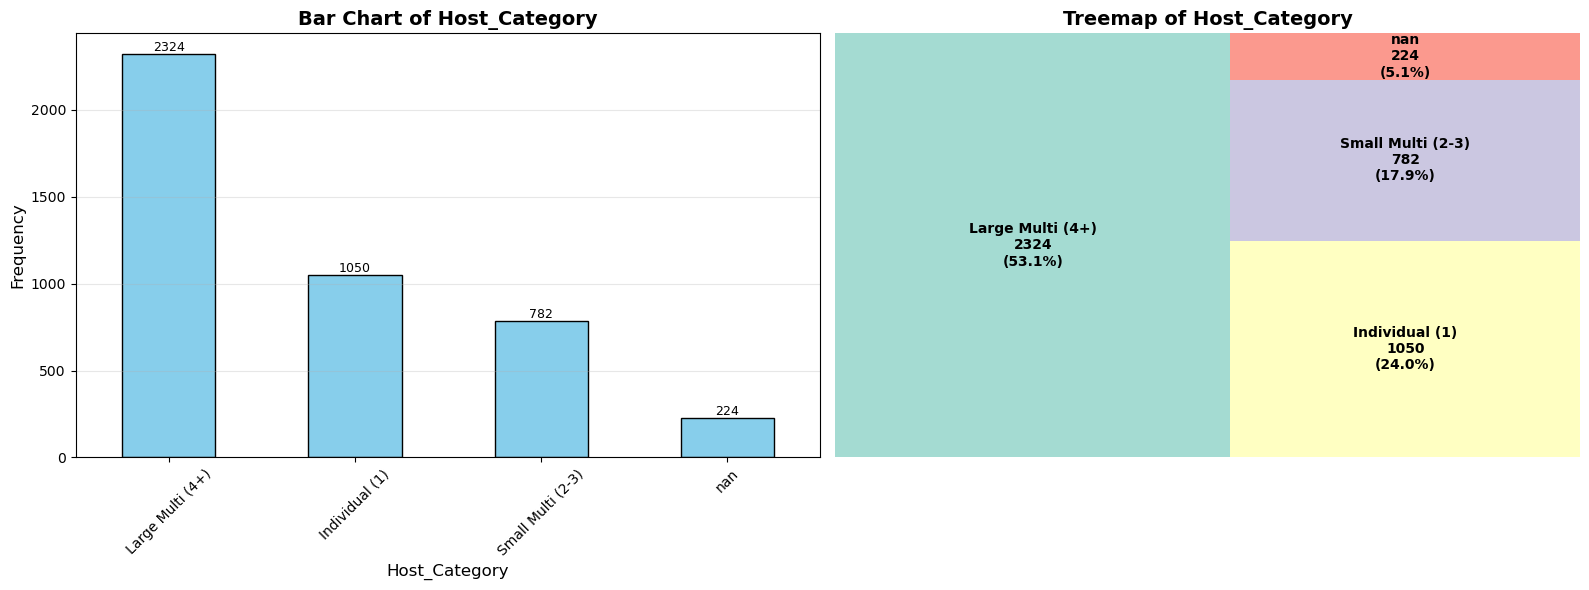

In [12]:
analyze_categorical_variable(df["Host_Category"])

3 - is superhost

CATEGORICAL VARIABLE ANALYSIS: host_is_superhost

Cardinality: 2 unique categories
Missing values: 337 (7.69%)
Total observations: 4380

Most Common Category: 'False' (2522 occurrences, 62.38%)

No rare categories found (<5% threshold)

----------------------------------------------------------------------
FREQUENCY TABLE:
----------------------------------------------------------------------
                   Count  Percentage
host_is_superhost                   
False               2522   62.379421
True                1521   37.620579


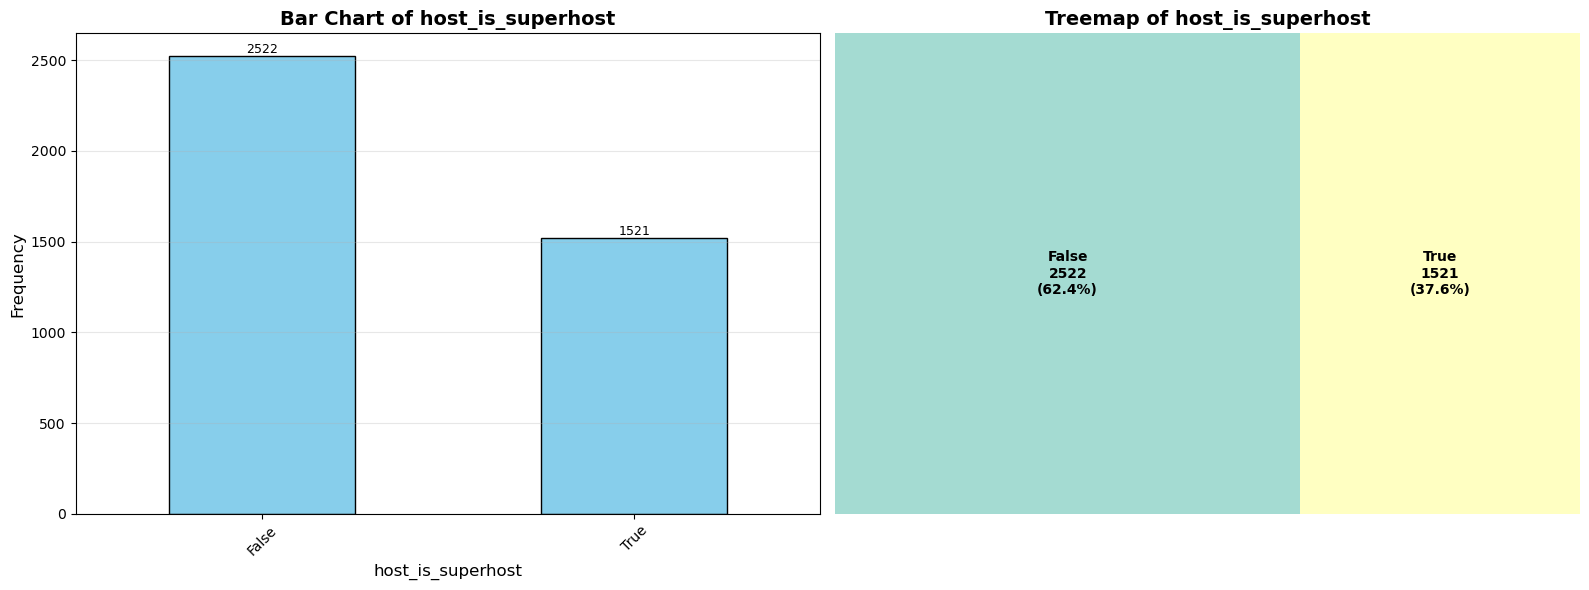

In [13]:
analyze_categorical_variable(df["host_is_superhost"])

4 - instant bookable

CATEGORICAL VARIABLE ANALYSIS: instant_bookable

Cardinality: 2 unique categories
Missing values: 0 (0.00%)
Total observations: 4380

Most Common Category: 'True' (2913 occurrences, 66.51%)

No rare categories found (<5% threshold)

----------------------------------------------------------------------
FREQUENCY TABLE:
----------------------------------------------------------------------
                  Count  Percentage
instant_bookable                   
True               2913   66.506849
False              1467   33.493151


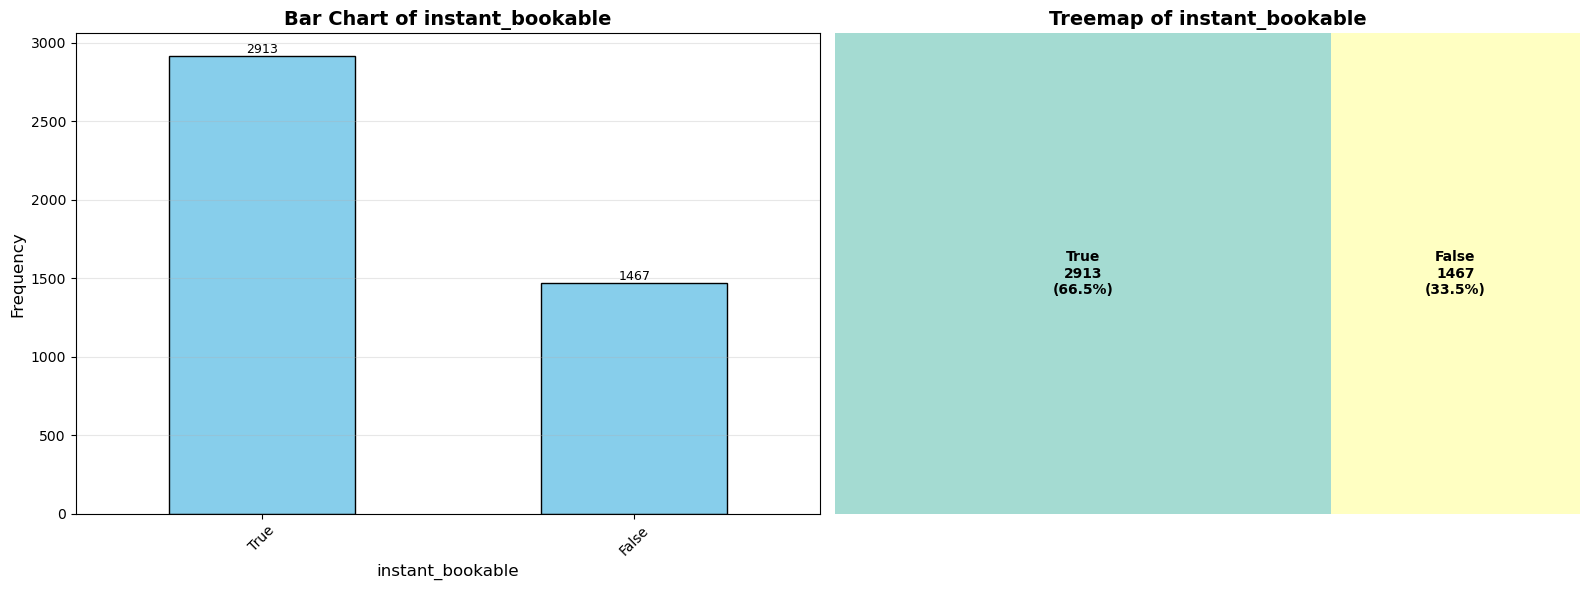

In [52]:
analyze_categorical_variable(df["instant_bookable"])

### Numerical

1 - price

In [61]:
df["price"].sort_values(ascending=False).head()

3339    9000.0
3323    2055.0
3601    1037.0
3599    1037.0
582     1000.0
Name: price, dtype: float64

DESCRIPTIVE STATISTICS: price

Central Tendency:
  Mean:           66.28
  Median:         54.50
  Mode:           44.0

Dispersion:
  Std Dev:        51.23
  Variance:       2624.38
  Range:          990.00
  IQR:            30.00

Quartiles:
  Min (0%):       10.00
  Q1 (25%):       44.00
  Q2 (50%):       54.50
  Q3 (75%):       74.00
  Max (100%):     1000.00

Shape:
  Skewness:       9.356
  Kurtosis:       138.879

Sample Size:
  Valid:          4170
  Missing:        209
  Total:          4379


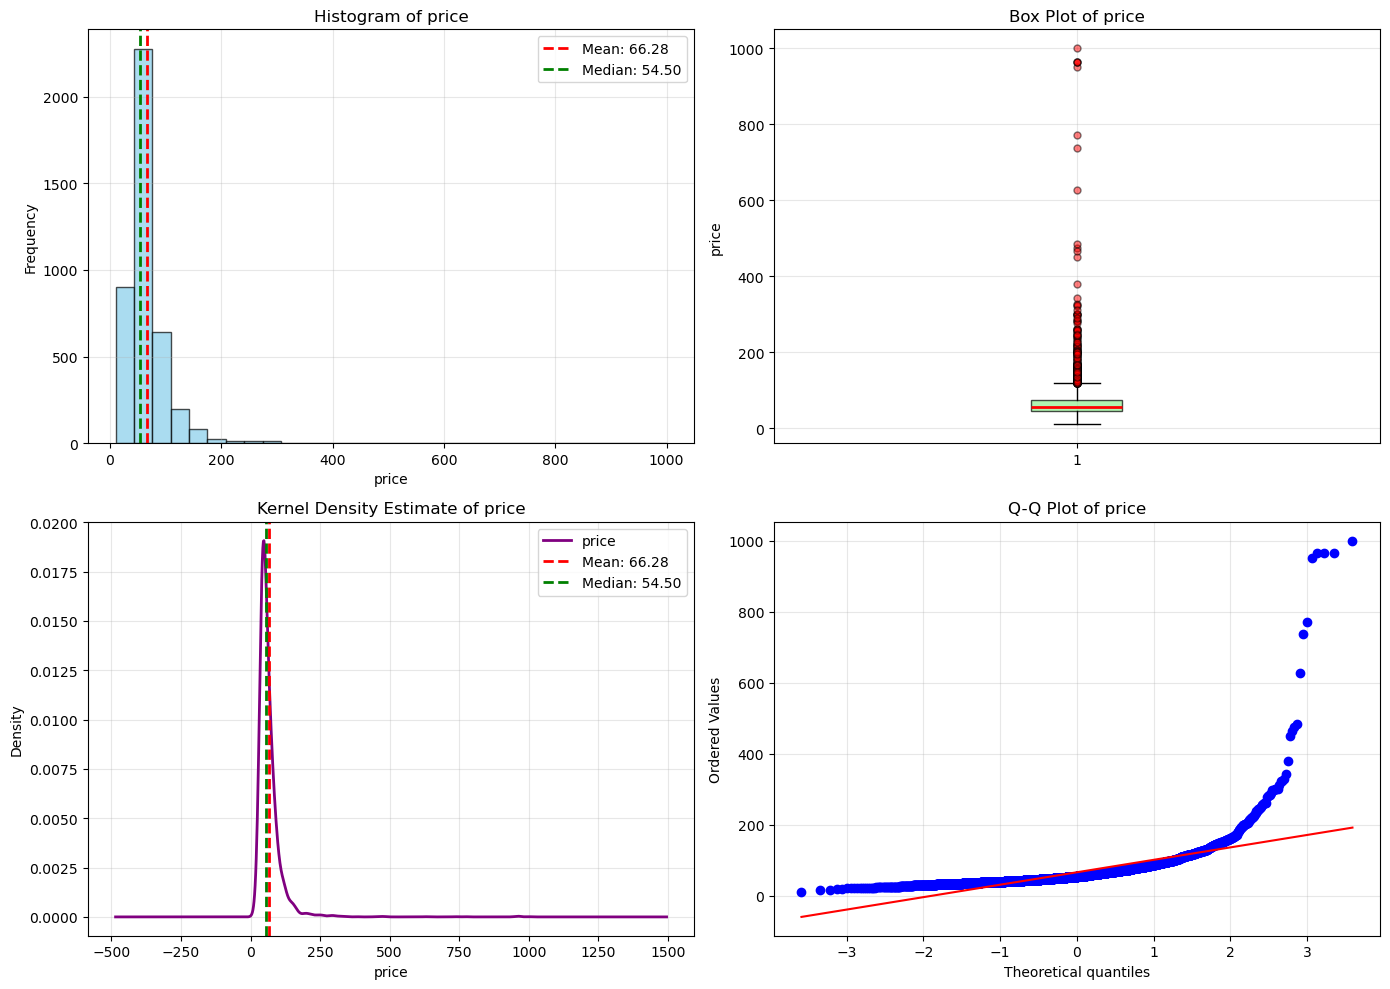

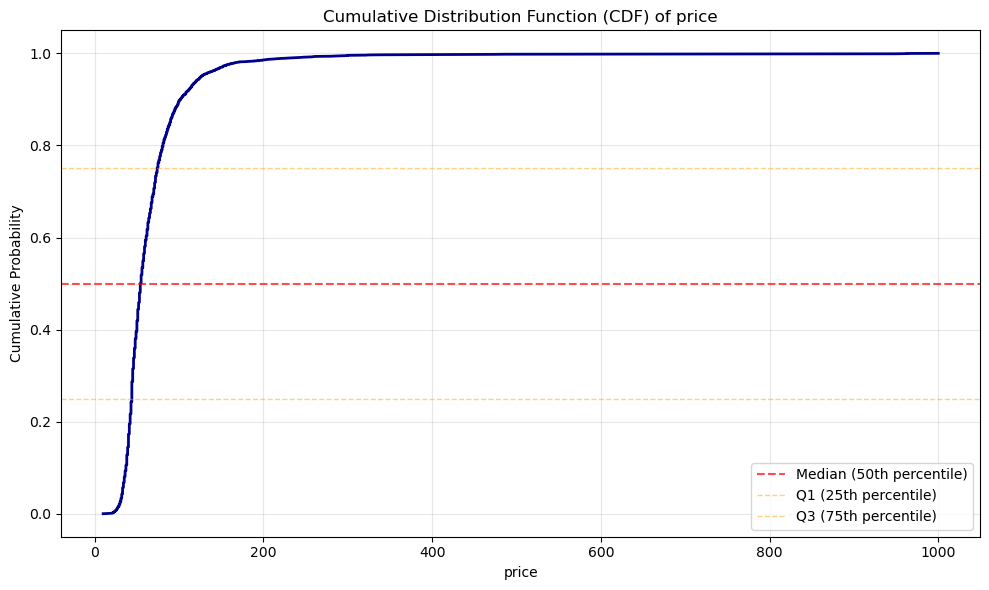

In [64]:
analyze_numeric_variable(df["price"])

2 - estimated revenue

DESCRIPTIVE STATISTICS: estimated_revenue_l365d

Central Tendency:
  Mean:           4002.38
  Median:         1980.00
  Mode:           0.0

Dispersion:
  Std Dev:        5747.88
  Variance:       33038118.24
  Range:          109896.00
  IQR:            5242.50

Quartiles:
  Min (0%):       0.00
  Q1 (25%):       469.50
  Q2 (50%):       1980.00
  Q3 (75%):       5712.00
  Max (100%):     109896.00

Shape:
  Skewness:       5.164
  Kurtosis:       61.287

Sample Size:
  Valid:          4170
  Missing:        209
  Total:          4379


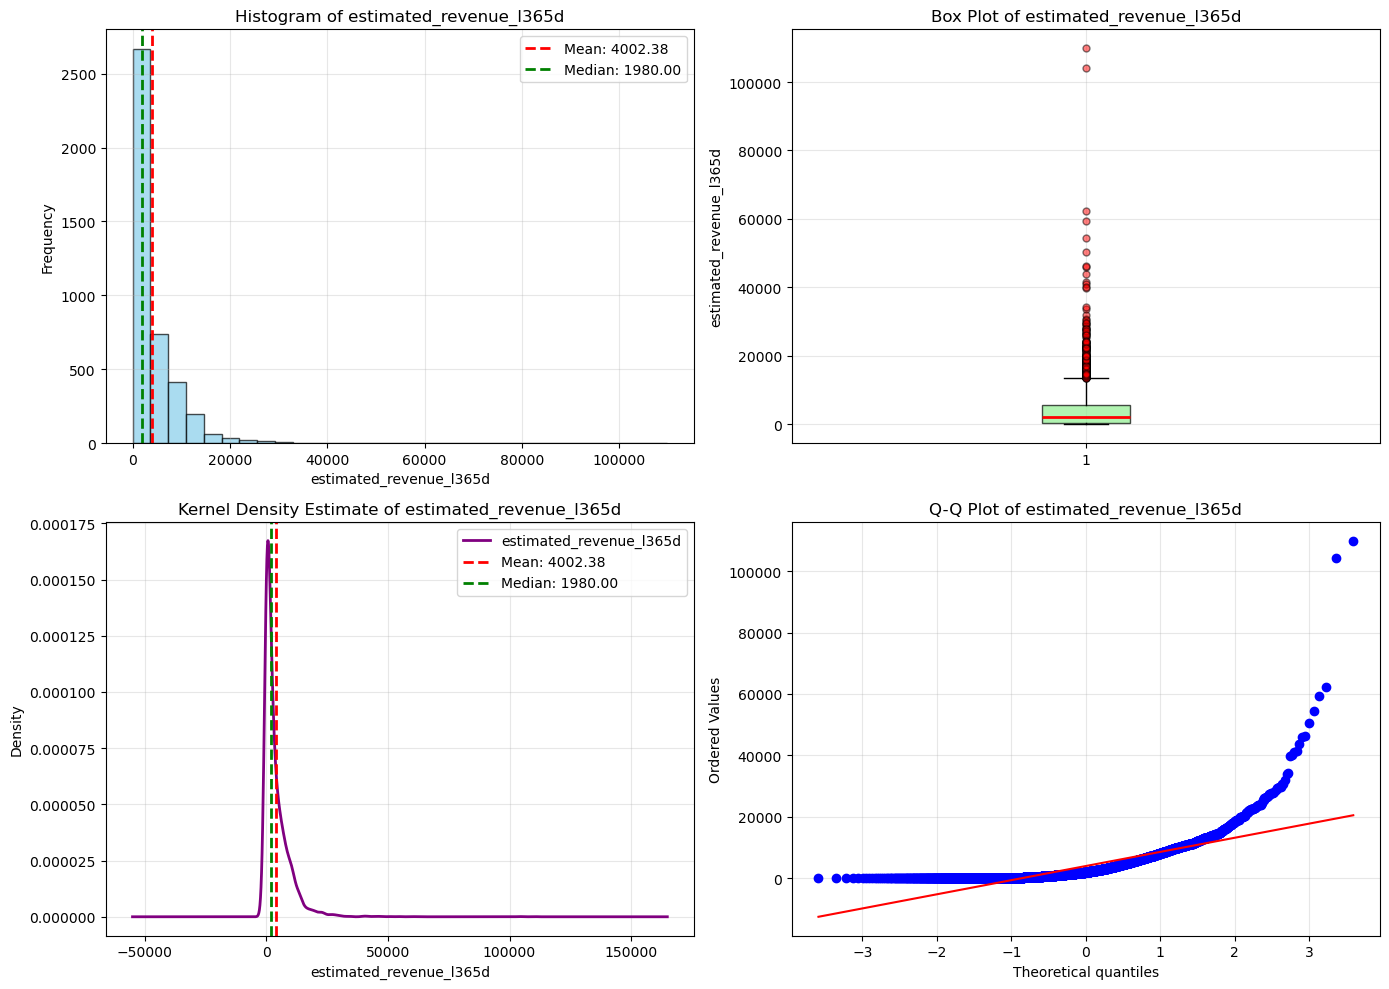

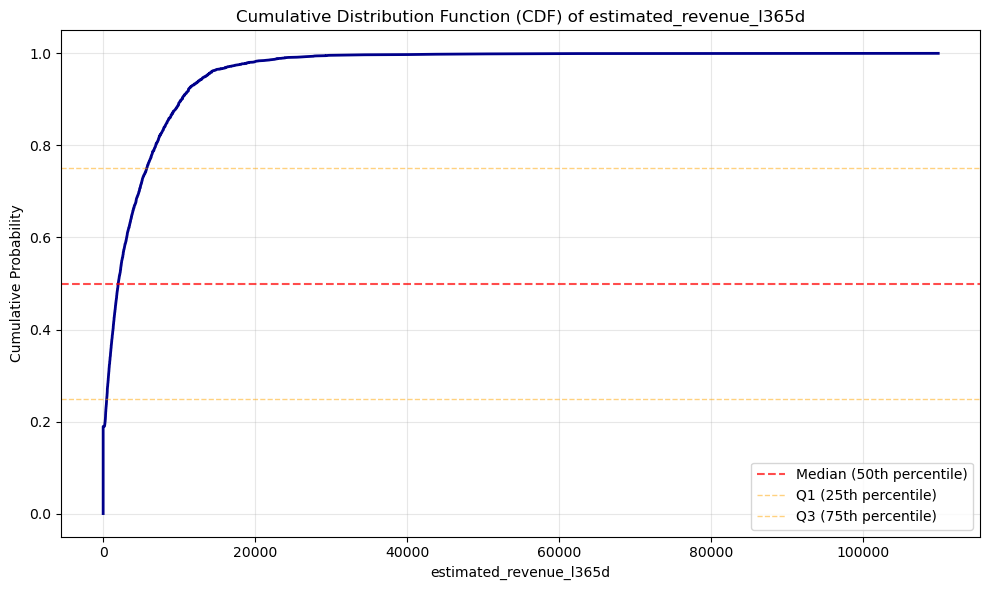

In [65]:
analyze_numeric_variable(df["estimated_revenue_l365d"])

3 - estimated occupnacy

DESCRIPTIVE STATISTICS: estimated_occupancy_l365d

Central Tendency:
  Mean:           66.87
  Median:         36.00
  Mode:           0

Dispersion:
  Std Dev:        75.67
  Variance:       5725.20
  Range:          255.00
  IQR:            102.00

Quartiles:
  Min (0%):       0.00
  Q1 (25%):       6.00
  Q2 (50%):       36.00
  Q3 (75%):       108.00
  Max (100%):     255.00

Shape:
  Skewness:       1.202
  Kurtosis:       0.328

Sample Size:
  Valid:          4379
  Missing:        0
  Total:          4379


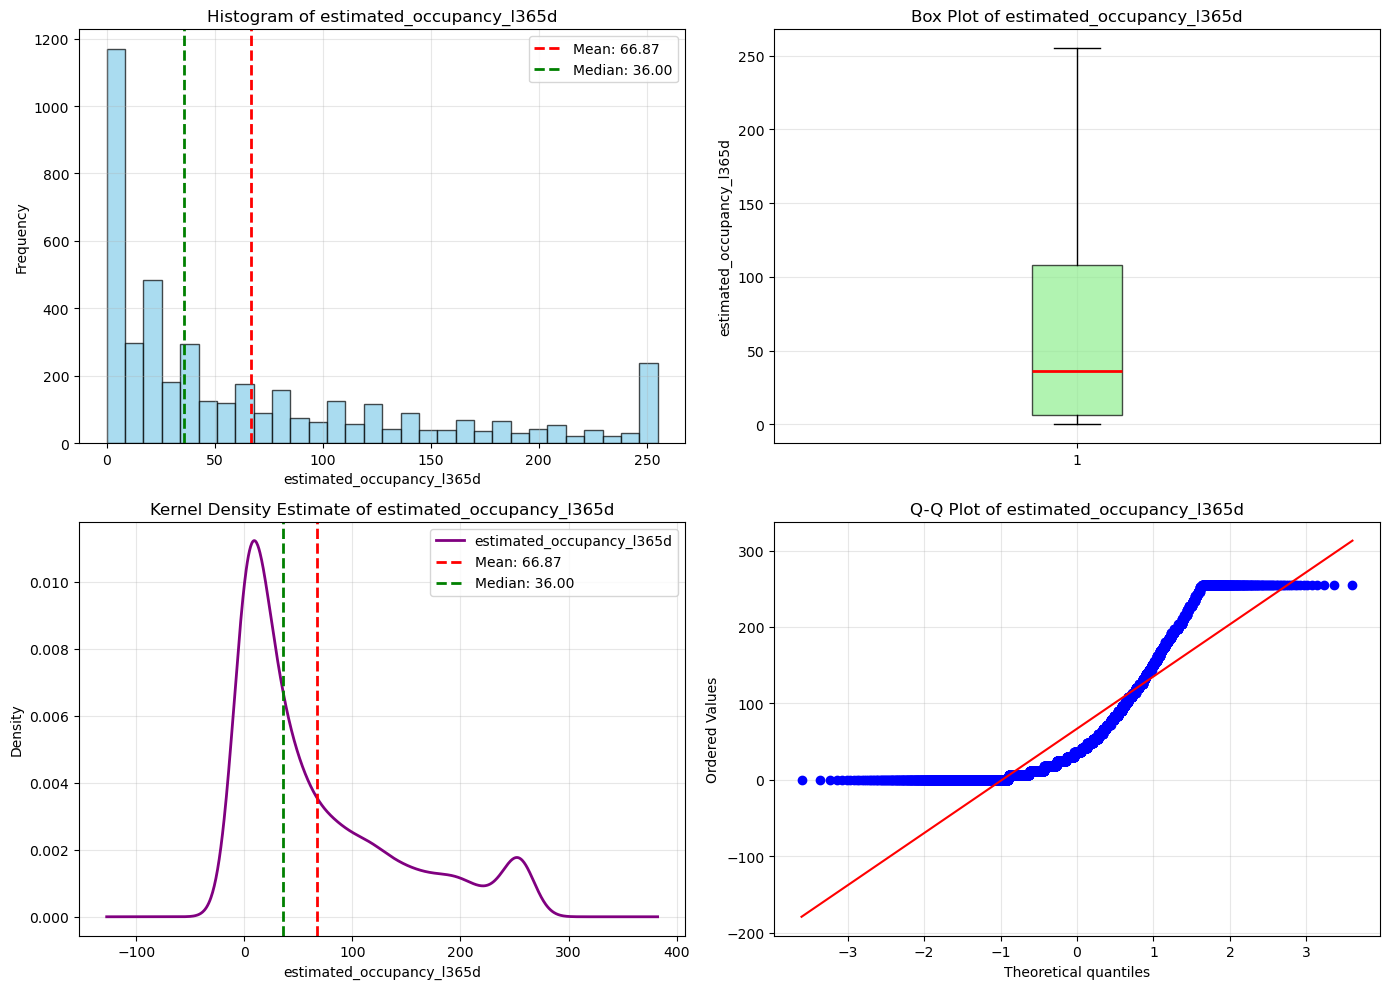

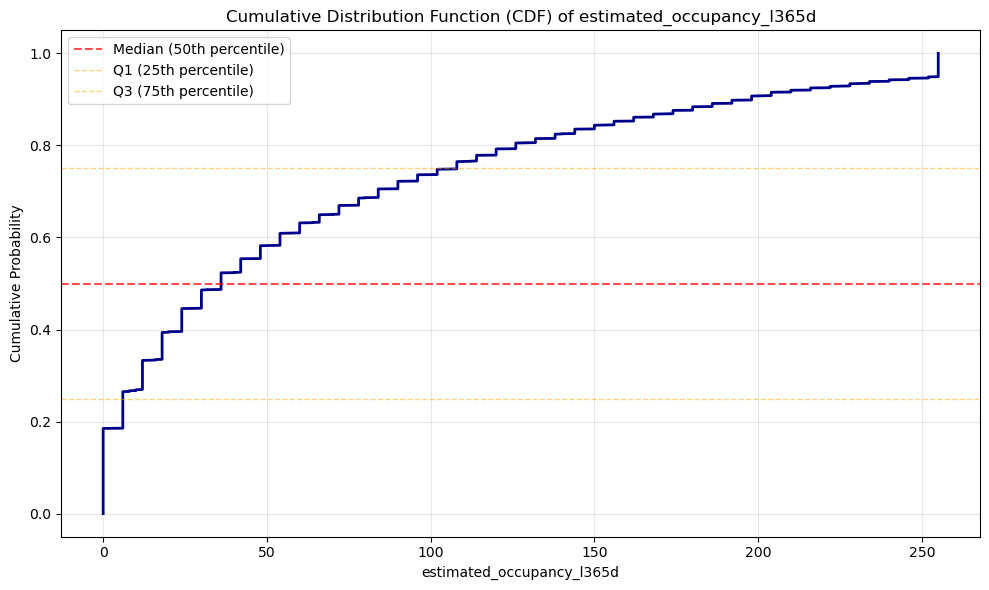

In [66]:
analyze_numeric_variable(df["estimated_occupancy_l365d"])

4 - reviews ltm

DESCRIPTIVE STATISTICS: number_of_reviews_ltm

Central Tendency:
  Mean:           11.65
  Median:         6.00
  Mode:           0

Dispersion:
  Std Dev:        15.26
  Variance:       232.85
  Range:          129.00
  IQR:            16.00

Quartiles:
  Min (0%):       0.00
  Q1 (25%):       1.00
  Q2 (50%):       6.00
  Q3 (75%):       17.00
  Max (100%):     129.00

Shape:
  Skewness:       2.310
  Kurtosis:       7.396

Sample Size:
  Valid:          4379
  Missing:        0
  Total:          4379


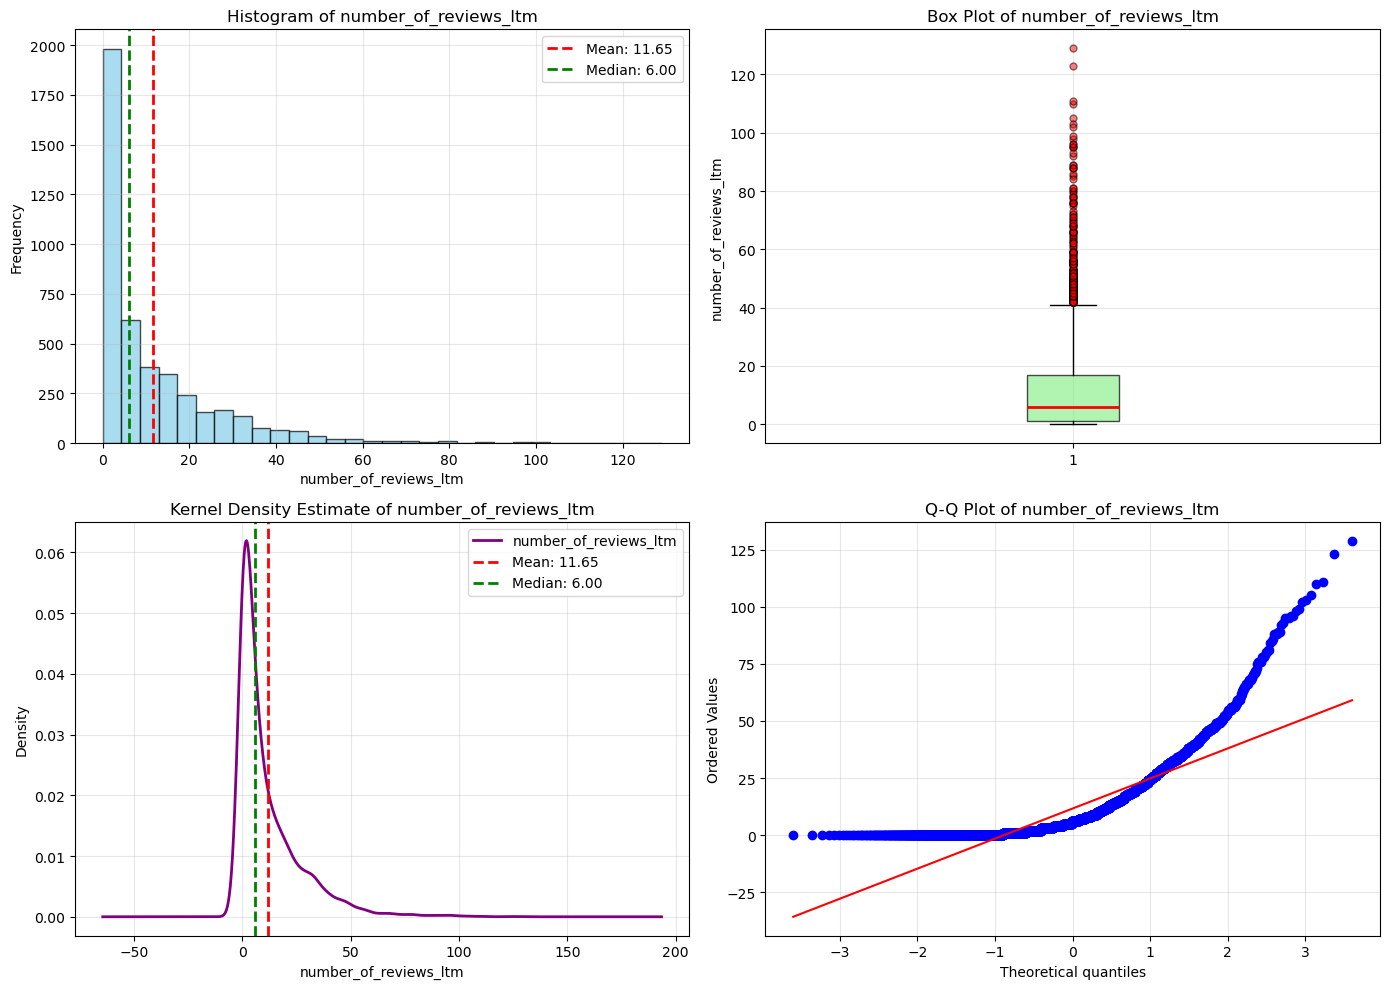

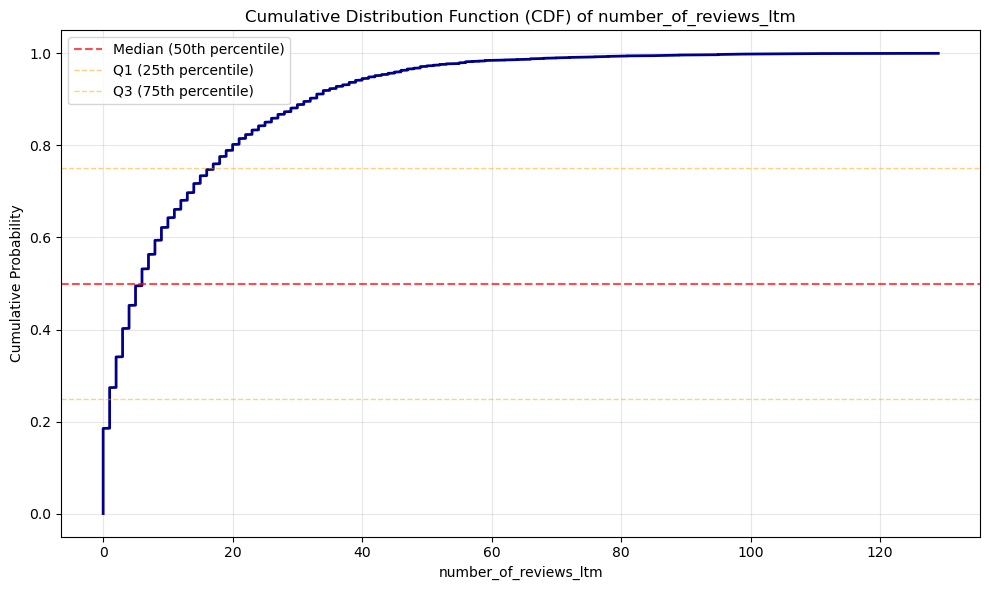

In [67]:
analyze_numeric_variable(df["number_of_reviews_ltm"])

5 - review rating

DESCRIPTIVE STATISTICS: review_scores_rating

Central Tendency:
  Mean:           4.73
  Median:         4.85
  Mode:           5.0

Dispersion:
  Std Dev:        0.40
  Variance:       0.16
  Range:          4.00
  IQR:            0.30

Quartiles:
  Min (0%):       1.00
  Q1 (25%):       4.67
  Q2 (50%):       4.85
  Q3 (75%):       4.97
  Max (100%):     5.00

Shape:
  Skewness:       -3.913
  Kurtosis:       23.943

Sample Size:
  Valid:          3918
  Missing:        461
  Total:          4379


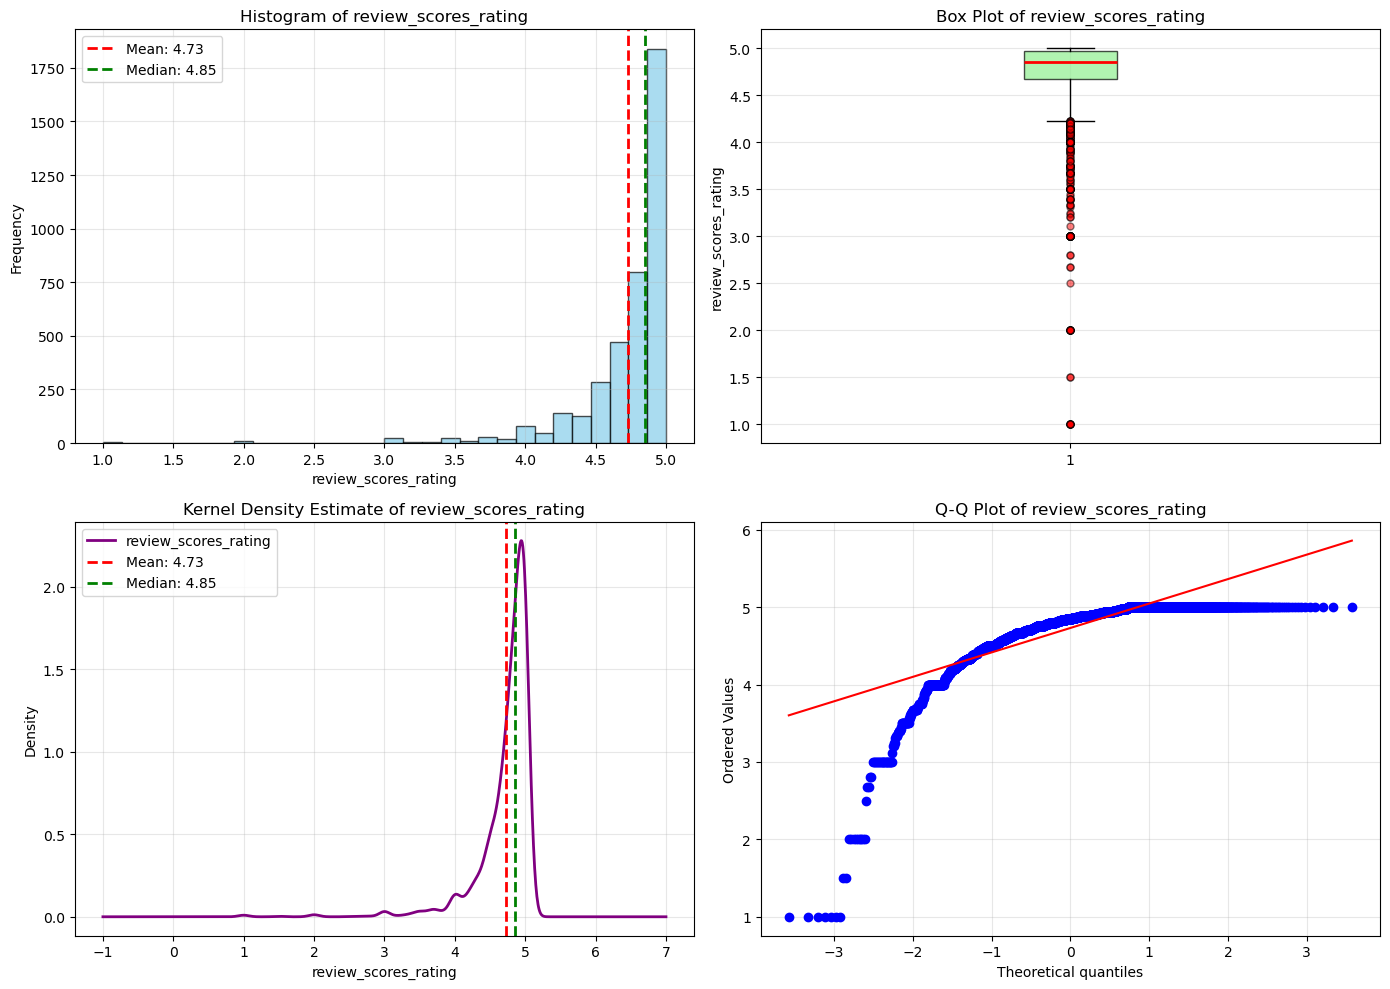

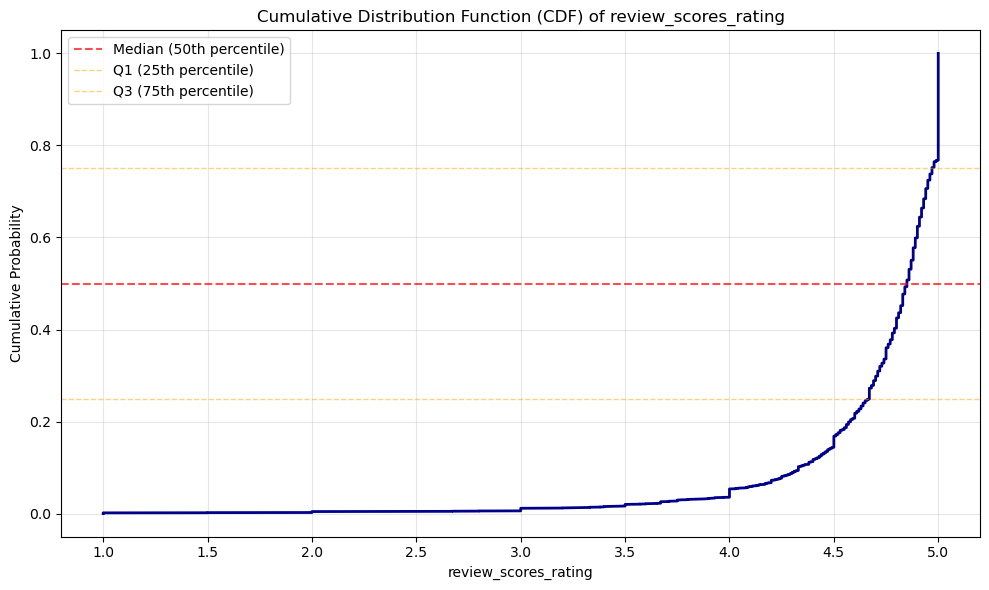

In [68]:
analyze_numeric_variable(df["review_scores_rating"])

6 - value rating

DESCRIPTIVE STATISTICS: review_scores_value

Central Tendency:
  Mean:           4.68
  Median:         4.78
  Mode:           5.0

Dispersion:
  Std Dev:        0.40
  Variance:       0.16
  Range:          4.00
  IQR:            0.32

Quartiles:
  Min (0%):       1.00
  Q1 (25%):       4.59
  Q2 (50%):       4.78
  Q3 (75%):       4.91
  Max (100%):     5.00

Shape:
  Skewness:       -3.835
  Kurtosis:       23.733

Sample Size:
  Valid:          3918
  Missing:        461
  Total:          4379


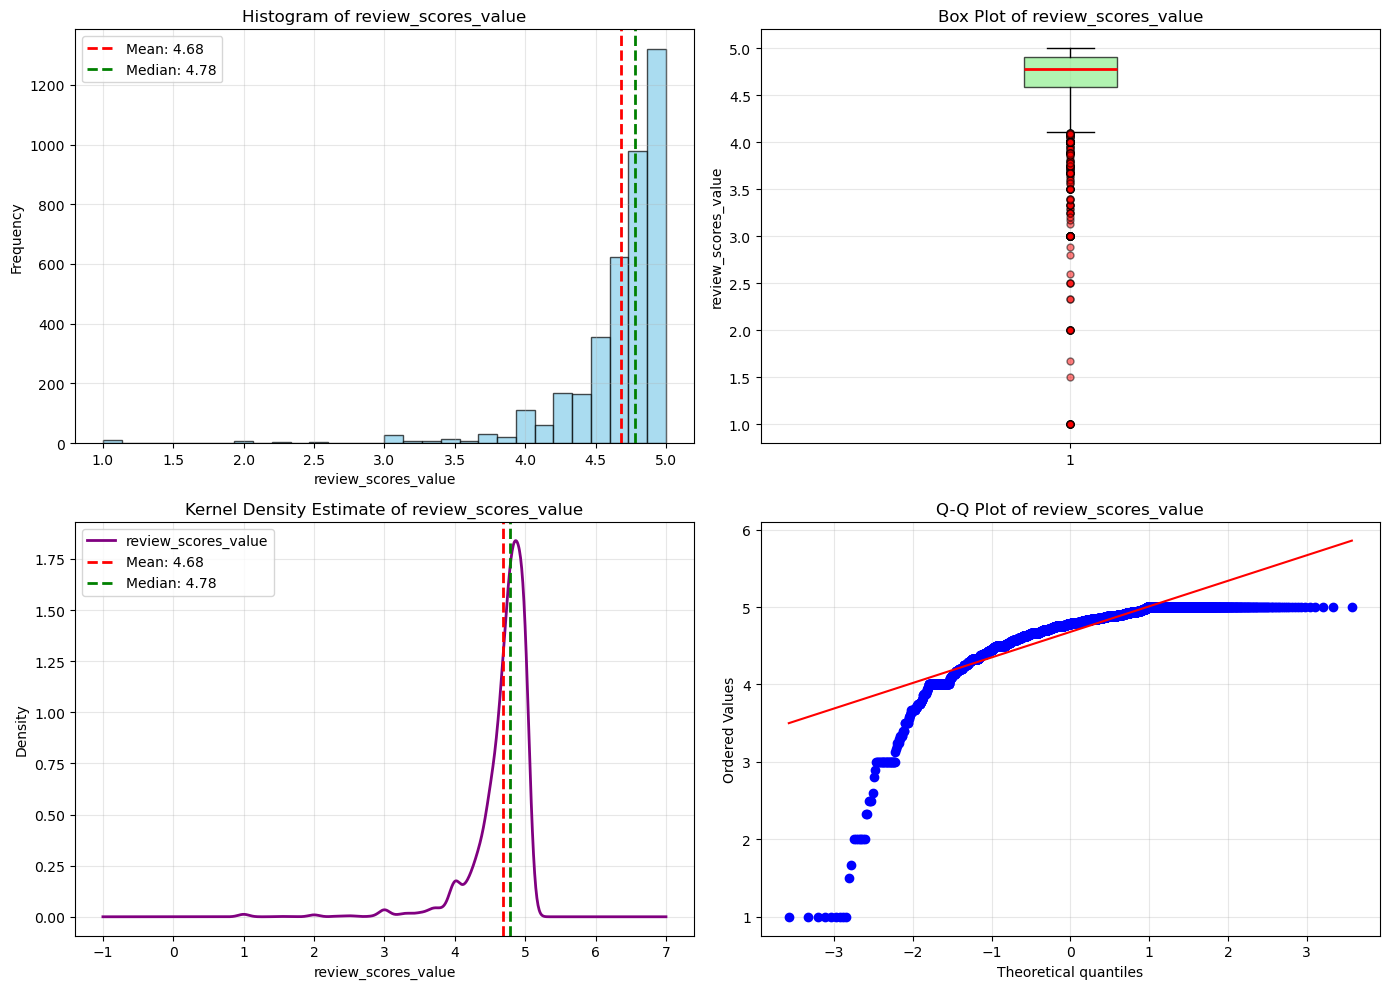

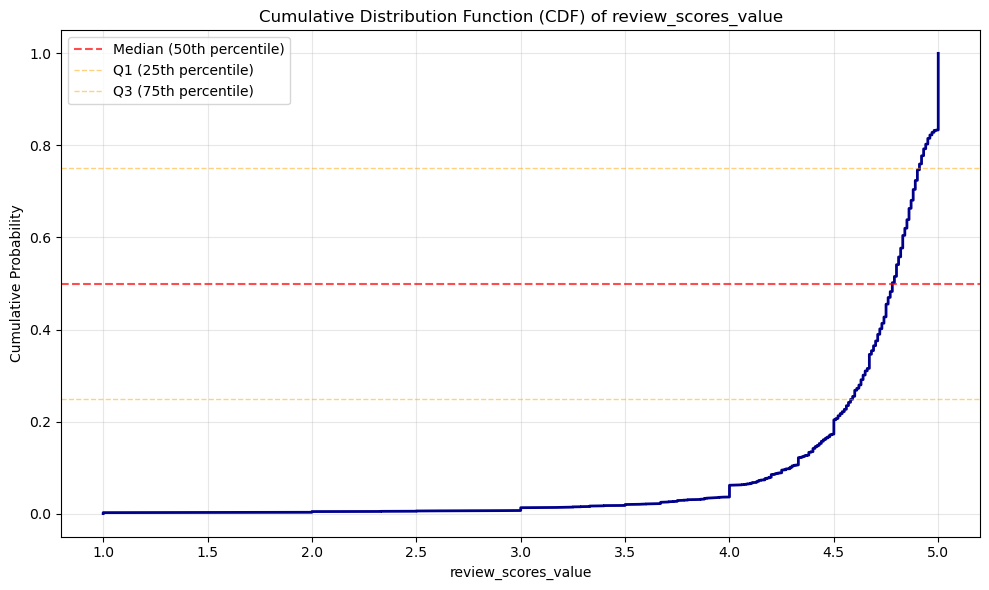

In [69]:
analyze_numeric_variable(df["review_scores_value"])

7 - host total listings

DESCRIPTIVE STATISTICS: host_total_listings_count

Central Tendency:
  Mean:           55.86
  Median:         5.00
  Mode:           1

Dispersion:
  Std Dev:        125.28
  Variance:       15694.59
  Range:          1037.00
  IQR:            32.00

Quartiles:
  Min (0%):       1.00
  Q1 (25%):       1.00
  Q2 (50%):       5.00
  Q3 (75%):       33.00
  Max (100%):     1038.00

Shape:
  Skewness:       3.543
  Kurtosis:       16.814

Sample Size:
  Valid:          4155
  Missing:        224
  Total:          4379


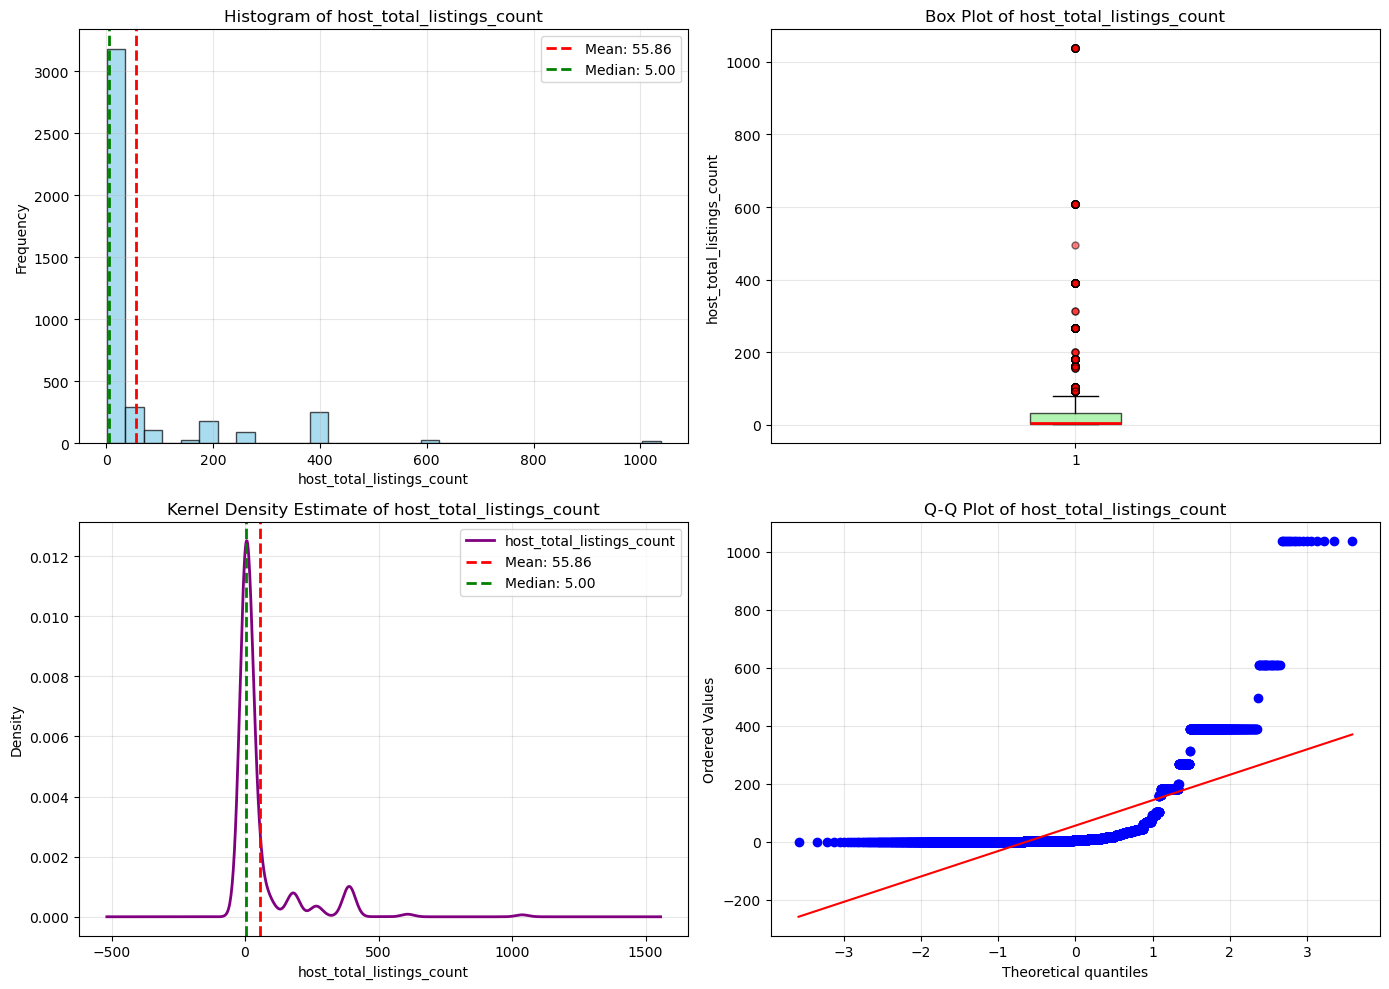

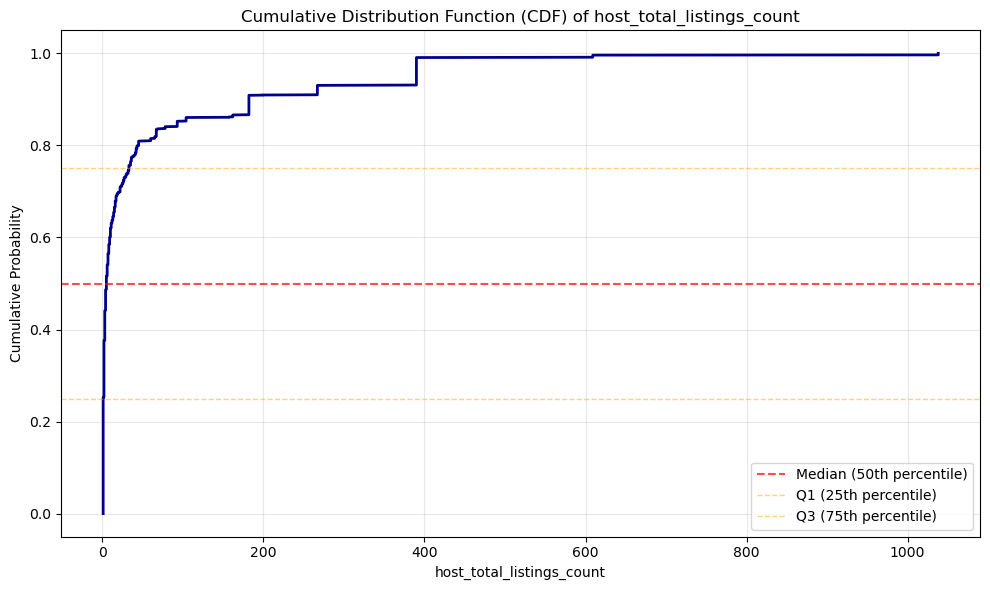

In [70]:
analyze_numeric_variable(df["host_total_listings_count"])

accomodates, bedrooms, bathrooms, beds